In [1]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
img_dir = r'C:\ai_project01\UTKFace'

file_names = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
file_names

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_0_20170112213001988.jpg.chip.jpg',
 '100_1_0_20170112213303693.jpg.chip.jpg',
 '100_1_0_20170112215032192.jpg.chip.jpg',
 '100_1_0_20170117195420803.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '100_1_2_20170112222336458.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '103_0_2_20170112213001988.jpg.chip.jpg',
 '105_0_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '105_1_1_20170112213303693.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_201701

In [3]:
age_list = [int(f.split('_')[0]) for f in file_names]
age_list

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 101,
 101,
 103,
 105,
 105,
 105,
 105,
 105,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 110,
 110,
 110,
 110,
 110,
 111,
 115,
 115,
 115,
 116,
 116,
 116,
 116,
 11,
 11,
 11,
 11,
 11,
 11

In [4]:
data = pd.DataFrame({
    'filename': file_names,
    'age': age_list
})
data

,filename,age
0,100_0_0_20170112213500903.jpg.chip.jpg,100
1,100_0_0_20170112215240346.jpg.chip.jpg,100
2,100_1_0_20170110183726390.jpg.chip.jpg,100
3,100_1_0_20170112213001988.jpg.chip.jpg,100
4,100_1_0_20170112213303693.jpg.chip.jpg,100
...,...,...
23703,9_1_3_20161220222856346.jpg.chip.jpg,9
23704,9_1_3_20170104222949455.jpg.chip.jpg,9
23705,9_1_4_20170103200637399.jpg.chip.jpg,9
23706,9_1_4_20170103200814791.jpg.chip.jpg,9


In [5]:
data = data.sort_values(by="age")
data

,filename,age
2226,1_1_0_20161219205534526.jpg.chip.jpg,1
2047,1_0_3_20161219225723376.jpg.chip.jpg,1
2048,1_0_3_20161219225759904.jpg.chip.jpg,1
2049,1_0_3_20161219225808112.jpg.chip.jpg,1
2050,1_0_3_20161219225811120.jpg.chip.jpg,1
...,...,...
183,115_1_1_20170112213257263.jpg.chip.jpg,115
184,116_1_0_20170112213001988.jpg.chip.jpg,116
185,116_1_0_20170120134921760.jpg.chip.jpg,116
186,116_1_2_20170112220255503.jpg.chip.jpg,116


In [6]:
data.reset_index(inplace=True)
data

,index,filename,age
0,2226,1_1_0_20161219205534526.jpg.chip.jpg,1
1,2047,1_0_3_20161219225723376.jpg.chip.jpg,1
2,2048,1_0_3_20161219225759904.jpg.chip.jpg,1
3,2049,1_0_3_20161219225808112.jpg.chip.jpg,1
4,2050,1_0_3_20161219225811120.jpg.chip.jpg,1
...,...,...,...
23703,183,115_1_1_20170112213257263.jpg.chip.jpg,115
23704,184,116_1_0_20170112213001988.jpg.chip.jpg,116
23705,185,116_1_0_20170120134921760.jpg.chip.jpg,116
23706,186,116_1_2_20170112220255503.jpg.chip.jpg,116


In [7]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
df_train

,index,filename,age
5096,3068,21_0_4_20161223214821265.jpg.chip.jpg,21
19586,18711,53_0_1_20170120222553113.jpg.chip.jpg,53
9835,8339,27_1_1_20170116022001556.jpg.chip.jpg,27
13631,12118,32_1_1_20170116023841155.jpg.chip.jpg,32
9807,7726,26_1_3_20170119180539188.jpg.chip.jpg,26
...,...,...,...
21575,20868,62_0_1_20170117175059690.jpg.chip.jpg,62
5390,3619,22_1_3_20170104222612607.jpg.chip.jpg,22
860,2682,1_1_4_20170109193938953.jpg.chip.jpg,1
15795,14323,37_0_3_20170119202304167.jpg.chip.jpg,37


In [9]:
df_test

,index,filename,age
17525,16322,43_0_1_20170116205314288.jpg.chip.jpg,43
1147,10508,2_1_4_20170103213243276.jpg.chip.jpg,2
1190,10111,2_0_2_20161219151420756.jpg.chip.jpg,2
9731,7645,26_1_3_20170117153041485.jpg.chip.jpg,26
7387,5708,25_1_4_20170103223722679.jpg.chip.jpg,25
...,...,...,...
16272,14882,39_0_2_20170104023022750.jpg.chip.jpg,39
4153,1157,17_1_1_20170103201529736.jpg.chip.jpg,17
2943,23659,9_0_1_20170110220605937.jpg.chip.jpg,9
18613,17517,49_1_0_20170103181849281.jpg.chip.jpg,49


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
batch_size = 32
image_size = (200, 200)

In [12]:
test_generator =  test_datagen.flow_from_dataframe(
    df_test,
    directory=img_dir,
    x_col='filename',
    y_col='age',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

Found 4742 validated image filenames.


In [13]:
model_path = 'best_age_model_final.h5'
age_model = load_model(model_path)

In [14]:
val_loss, val_mae = age_model.evaluate(test_generator, verbose=1)

149/149 [==============================] - 7s 34ms/step - loss: 62.1598 - mae: 5.6844


In [16]:
print("\n==============================================")
print("최종 테스트 데이터 모델 평가 결과")
print("==============================================")
print("테스트 데이터 손실(Loss): {val_loss:.4f}")
print("테스트 데이터 평균절대오차(MAE): {val_mae:.2f}")
print("==============================================")


최종 테스트 데이터 모델 평가 결과
테스트 데이터 손실(Loss): {val_loss:.4f}
테스트 데이터 평균절대오차(MAE): {val_mae:.2f}


In [21]:
Tk().withdraw()

file_path = askopenfilename(
    title='이지미 파일을 선택하세요',
    filetypes=[('Image Files', '*.png;*.jpg;*.jpeg')]
)

print("선택한 파일:", file_path)

선택한 파일: C:/Users/User/Desktop/손흥민_얼굴.png


1/1 [==============================] - 0s 17ms/step


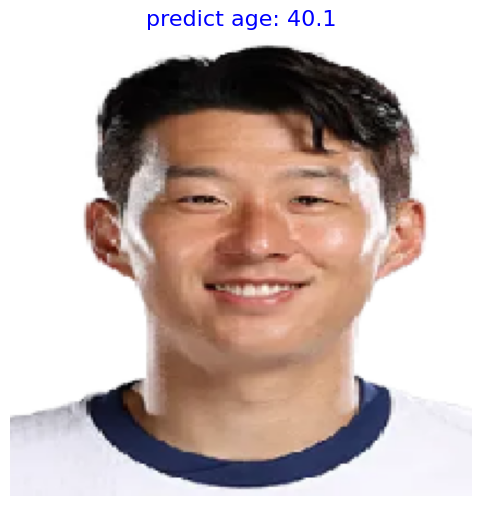

In [22]:
if file_path:
    uploaded_image = load_img(file_path, target_size=(200, 200))
    uploaded_image_array = img_to_array(uploaded_image) / 255.0
    uploaded_image_array = np.expand_dims(uploaded_image_array, axis=0)
    predicted_age = age_model.predict(uploaded_image_array)[0][0]

    plt.figure(figsize=(6, 6))
    plt.imshow(uploaded_image)
    plt.axis('off')
    plt.title(f"predict age: {predicted_age:.1f}", fontsize=16, color='blue')
    plt.show()

else:
    print("\n파일을 선택하지 않았습니다. 프로그램을 종료합니다.\n")